## Question 1 

See my paper, on which I derive the reestimation of the parameters ($\mu_k$ and $\Sigma_k$) for the Gaussian Mixture Model.

## Question 2

Text(0, 0.5, 'y coordinate')

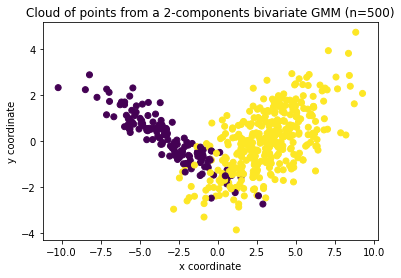

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# function to draw n points with respect to a 2 components bivariate GMM
# it returns a list of points and a list of labels (0 or 1)
def simulate_bivariate_gmm(n, mu1, sigma1, mu2, sigma2):
    class_id = np.random.choice([0,1], n, p=[0.3, 0.7])
    points_list = []
    for e in class_id:
        if e == 0:
            points_list.append(np.random.multivariate_normal(mu1, sigma1))
        else:
            points_list.append(np.random.multivariate_normal(mu2, sigma2))
                    
    return points_list, class_id


# the means
mu1 = [-3, 0]
mu2 = [3, 0]
# the covariance matrices
sigma1 = [[5, -2], [-2, 1]]
sigma2 = [[5, 2], [2, 2]]

n = 500

# we plot the cloud of points with the labels
points_list, labels = simulate_bivariate_gmm(n, mu1, sigma1, mu2, sigma2)
plt.scatter([e[0] for e in points_list], [e[1] for e in points_list], c=labels)
            
plt.title("Cloud of points from a 2-components bivariate GMM (n=500)")   
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")


We see on the plot that we have 2 clusters whose shape is elliptical. We can easilly see that the center of each cluster is the mean of each normal distribution. We also see that one cluster has more samples than the other and this is directly coming from the probability of each class, class 2 has a probability of 0.7 whereas the probability of class 1 is only 0.3.

The value of the covariance matrix gives the shape of the ellipse and the direction and the strength of the dispersion wrt to each axis. 

## Questions 3 and 4 

Text(0.5, 1.0, 'Unistroke data for letter A')

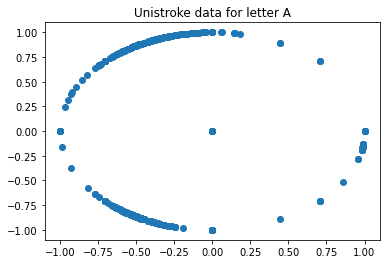

In [45]:
from math import sqrt,exp

x = []
y = []

for i in range(1, 51):
    index = "0" + str(i) if i <= 9 else str(i) 
    current_x = []
    current_y = []
    with open('Unistroke/A' + index + '.txt','r') as f:
        for l in f:
            row = l.split()
            current_x.append(float(row[0]))
            current_y.append(float(row[1]))
            #print(row)
    direction_x = [current_x[i]-current_x[i-1] for i in range(1, len(current_x))]
    direction_y = [current_y[i]-current_y[i-1] for i in range(1, len(current_y))]
    norme_tab = [sqrt(dir_x**2+dir_y**2) for dir_x, dir_y in zip(direction_x, direction_y)]
    
    x = x + [0 if norm==0 else direc/norm for direc, norm in zip(direction_x, norme_tab)]
    y = y + [0 if norm==0 else direc/norm for direc, norm in zip(direction_y, norme_tab)]
        
plt.scatter(x, y)
plt.title("Unistroke data for letter A")
        

With this first look, we can assume that a 2 components GMM is appropriate for the A letter because it seems here that we have 2 clusters. Each cluster represents a 'bar' from the letter and has an elliptical shape. If we compare to the first plot, the cloud of points has the same shape as the bivariate model we used but with differents mean vectors and less dispersion. 

# 1.1.2 Data analysis : Gaussian Model

## Question 1

In [46]:
from sklearn.mixture import GaussianMixture


X = np.array([np.array([coord_x, coord_y]) for coord_x, coord_y in zip(x, y)])

gmm = GaussianMixture(2)
gmm.fit(X)

GaussianMixture(n_components=2)

In [47]:
print(gmm.weights_)

[0.54108086 0.45891914]


In [48]:
print(gmm.means_)

[[-0.33607016  0.7445901 ]
 [-0.26688928 -0.78192078]]


In [49]:
print(gmm.covariances_)

[[[ 0.07266609 -0.00684283]
  [-0.00684283  0.12372223]]

 [[ 0.25648605  0.10606443]
  [ 0.10606443  0.06088082]]]


## Question 2

<ipython-input-53-3dc064a5851e>:29: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X1, Y1, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),


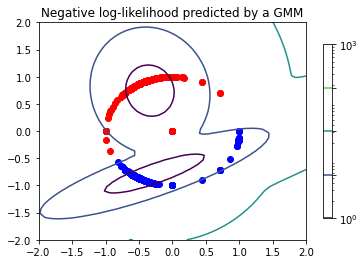

In [53]:
labels = gmm.predict(X)

x_class_0 = []
y_class_0 = []
x_class_1 = []
y_class_1 = []


for i in range(len(x)):
    if labels[i] == 0:
        x_class_0.append(X[i][0])
        y_class_0.append(X[i][1])
    else:
        x_class_1.append(X[i][0])
        y_class_1.append(X[i][1])

Xp = np.linspace(-2., 2.)
Yp = np.linspace(-2., 2.)
#meshgrid is used to create a rectangular grid out of two given one-dimensional arrays
X1,Y1=np.meshgrid(Xp,Yp)
#ravel is used to create a contiguous flattened array
XX = np.array([X1.ravel(), Y1.ravel()]).T
#score_samples compute the weighted log probabilities for each sample
Z = -gmm.score_samples(XX)
Z = Z.reshape(X1.shape)
CS = plt.contour(X1, Y1, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 5))
#CS = plt.contourf(X1, Y1, Z)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
#print(Z)        
plt.scatter(x_class_0, y_class_0, color='red')
plt.scatter(x_class_1, y_class_1, color='blue')
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()
#plt.show()


    

if we use more than 2 components, we note that the number of ellipses will grow

## Question 3

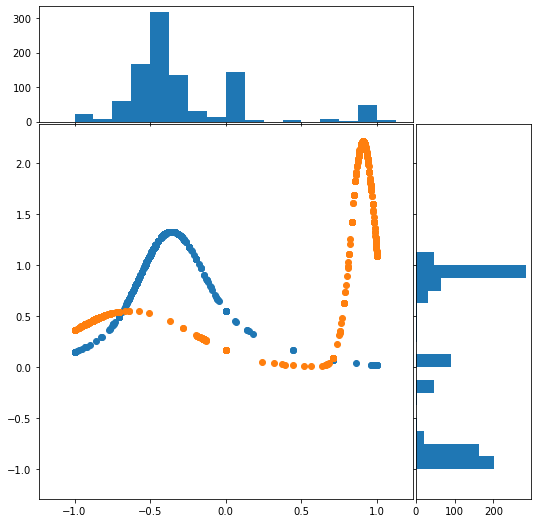

In [31]:
from scipy.stats import norm
gmm1=GaussianMixture(2)
X2 = np.array([np.array([coord_x, coord_y]) for coord_x, coord_y in zip(x, [0 for i in range(len(y))])])
Y2 = np.array([np.array([coord_x, coord_y]) for coord_x, coord_y in zip([0 for i in range(len(x))], y)])
gmm1.fit(X2)


def uniGMM(x,index):
    weights=gmm.weights_
    means=gmm.means_
    covariances=gmm.covariances_
    
    g1=norm.pdf(x,loc=means[0][index],scale=sqrt(covariances[0][index][index]))
    g2=norm.pdf(x,loc=means[1][index],scale=sqrt(covariances[1][index][index]))
    g=weights[0]*g1+weights[1]*g2
    
    return g

        
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    x_values = np.linspace(-1, 1, 1000)
    ax.scatter(x, uniGMM(x,0))
    ax.scatter(y, uniGMM(y,1))
    
    binwidth = 0.125
    xymax = 1
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
    

def showGraphs(x,y,rect_scatter,rect_histx,rect_histy):
    # start with a square Figure
    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)

    # use the previously defined function
    scatter_hist(x, y, ax, ax_histx, ax_histy)

    plt.show()
    
    
    
    
    
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]


# use the previously defined function
showGraphs(x,y,rect_scatter,rect_histx,rect_histy)

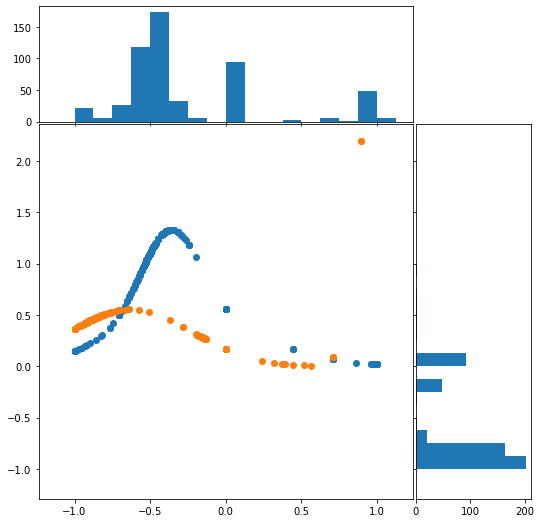

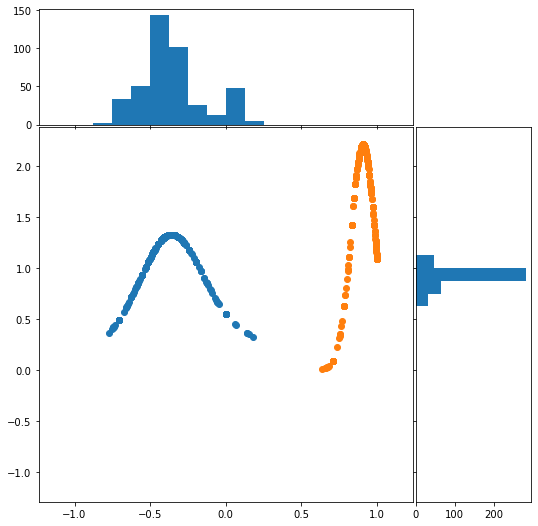

In [32]:



showGraphs(x_class_0,y_class_0,rect_scatter,rect_histx,rect_histy)
showGraphs(x_class_1,y_class_1,rect_scatter,rect_histx,rect_histy)

## Question 5

Text(0.5, 1.0, 'Posterior probabilty of the data point with a 2 components GMM')

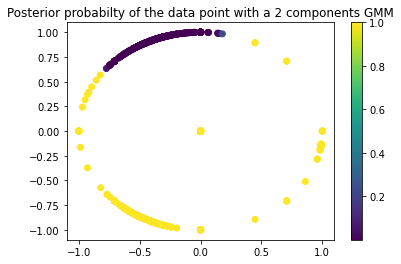

In [34]:
c = gmm.predict_proba(X)[:, 0]

plt.scatter(X[:, 0], X[:, 1], c=c)
plt.colorbar()
plt.title("Posterior probabilty  2 components GMM")

# 1.2 mandatory additional questions

## Question 1

In [35]:
ang = []
from math import atan2
for x in X:
    ang.append(atan2(x[1], x[0]))

Text(0, 0.5, 'Observations')

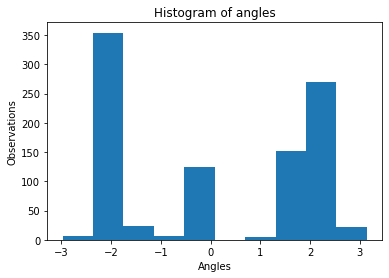

In [36]:
plt.hist(ang)
plt.title("Histogram of angles")
plt.xlabel("Angles")
plt.ylabel("Observations")

## Question 2

Von Mises Distribution is a continuous probability distribution with a range from 0 to 2π. It is similar to the normal distribution, except coordinates are placed on a circular plane.